<h1>Install necessary libraries<h1>

In [1]:
!pip install transformers
!pip install SentencePiece
import cProfile
import pandas as pd
import matplotlib.pyplot as plt
import time
from transformers import AutoTokenizer
from transformers import OpenAIGPTTokenizer
from transformers import XLMRobertaTokenizer

You should consider upgrading via the 'C:\Users\rahee\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\rahee\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Specify the tokenizer models to be used

In [2]:
tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased") # BERT is using wordpiece tokenization method
tokenizer_openai = OpenAIGPTTokenizer.from_pretrained("openai-gpt") # openai-gpt is using BPE tokenization.
tokenizer_xlmroberta = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base") # XLM-RoBERTa is using SentencePiece tokenization and supports Unicode

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


Specify the path to the two text file and initialize empty lists to store the lines

In [3]:
file_path = 'prompts.txt'
prompts_lines = []

file_path2 = 'glassdoor-reviews.txt'
glassdoor_lines = []

Open the two text file and read its contents line by line and append them to the lists

In [4]:
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        prompts_lines.append(line.strip())

with open(file_path2, 'r', encoding='utf-8') as file:
    for line in file:
        glassdoor_lines.append(line.strip())

<h1>Comparision of encoding batched data using prompts.txt dataset<h1>

Response time for encoding batched data with BERT tokenization model: 0.022480487823486328 seconds
Response time for encoding batched data with openAI tokenization model: 0.1711280345916748 seconds
Response time for encoding batched data with XLMRoberta tokenization model: 0.05151200294494629 seconds


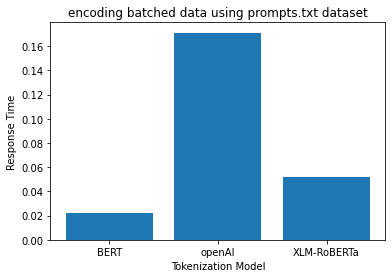

In [36]:
# Encoding batched data with BERT model
start_time_bert = time.time()  
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_bert = time.time()  
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time() 
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time() 
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding batched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding batched data using prompts.txt dataset')
plt.show()




<h1>Comparision of encoding batched data using glassdoor-reviews.txt dataset<h1>

Response time for encoding batched data with BERT tokenization model: 0.184248685836792 seconds
Response time for encoding batched data with openAI tokenization model: 2.318967819213867 seconds
Response time for encoding batched data with XLMRoberta tokenization model: 0.724635124206543 seconds


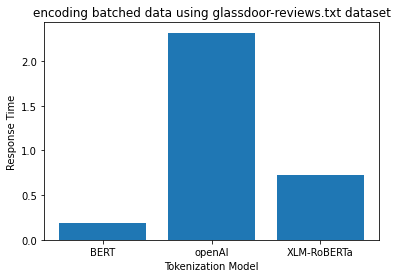

In [37]:
# Encoding batched data with BERT model
start_time_bert = time.time()  
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_bert = time.time()  
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time() 
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time() 
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding batched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding batched data using glassdoor-reviews.txt dataset')
plt.show()




<h1>Comparision of decoding batched data using prompts.txt dataset<h1>

Response time for detokenizing batched data with BERT tokenization model: 0.08262300491333008 seconds
Response time for detokenizing batched data with openAI tokenization model: 0.06957626342773438 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 0.08000063896179199 seconds


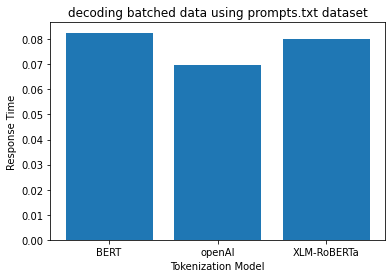

In [53]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Decoding batched data with BERT model
start_time_bert = time.time() 
detokenized_sentences_bert = tokenizer_bert.batch_decode(ids_bert)
end_time_bert = time.time()
#print(detokenized_sentences_bert)
response_time_bert = end_time_bert - start_time_bert

# Decoding batched data with openAI model
start_time_openai = time.time()
detokenized_sentences_openai = tokenizer_openai.batch_decode(ids_openai)
end_time_openai = time.time()
#print(detokenized_sentences_openai)
response_time_openai = end_time_openai - start_time_openai

# Decoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
detokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_decode(ids_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta

print(f"Response time for detokenizing batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding batched data using prompts.txt dataset')
plt.show()

In [ ]:
<h1>Comparision of decoding batched data using glassdoor-reviews.txt dataset<h1>

Response time for detokenizing batched data with BERT tokenization model: 1.1680707931518555 seconds
Response time for detokenizing batched data with openAI tokenization model: 1.0022623538970947 seconds
Response time for detokenizing unbatched data with openAI tokenization model: 1.217076063156128 seconds


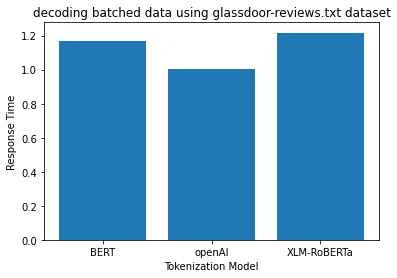

In [43]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list


# Encoding batched data with BERT model
start_time_bert = time.time() 
detokenized_sentences_bert = tokenizer_bert.batch_decode(ids_bert)
end_time_bert = time.time()
#print(detokenized_sentences_bert)
response_time_bert = end_time_bert - start_time_bert

# Encoding batched data with openAI model
start_time_openai = time.time()
detokenized_sentences_openai = tokenizer_openai.batch_decode(ids_openai)
end_time_openai = time.time()
#print(detokenized_sentences_openai)
response_time_openai = end_time_openai - start_time_openai

# Encoding batched data with XLM-RoBERTa model
start_time_xlmroberta = time.time()
detokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_decode(ids_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta

print(f"Response time for detokenizing batched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing batched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with openAI tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding batched data using glassdoor-reviews.txt dataset')
plt.show()

In [ ]:
<h1>Comparision of encoding unbatched data using prompts.txt dataset<h1>

Response time for encoding unbatched data with BERT tokenization model: 0.041016578674316406 seconds
Response time for encoding unbatched data with openAI tokenization model: 0.177093505859375 seconds
Response time for encoding unbatched data with XLMRoberta tokenization model: 0.060001373291015625 seconds


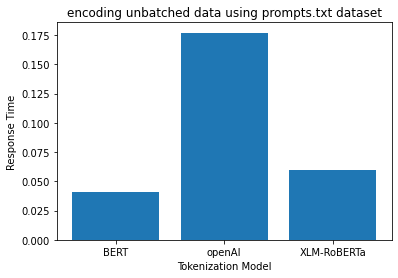

In [47]:
# Encoding unbatched data with BERT model
start_time_bert = time.time()  
for element in prompts_lines:
    encoding_unbatched_bert = tokenizer_bert.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_bert = time.time()  
response_time_bert = end_time_bert - start_time_bert

# Encoding unbatched data with openAI model
start_time_openai = time.time() 
for element in prompts_lines:
    encoding_unbatched_openai = tokenizer_openai.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding unbatched data with XLM-RoBERTa model
start_time_xlmroberta = time.time() 
for element in prompts_lines:
    encoding_unbatched = tokenizer_xlmroberta.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding unbatched data using prompts.txt dataset')
plt.show()

<h1>Comparision of encoding unbatched data using glassdoor-reviews.txt dataset<h1>

Response time for encoding unbatched data with BERT tokenization model: 0.6638789176940918 seconds
Response time for encoding unbatched data with openAI tokenization model: 2.433009624481201 seconds
Response time for encoding unbatched data with XLMRoberta tokenization model: 0.8303654193878174 seconds


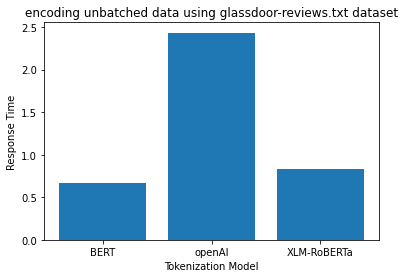

In [48]:
# Encoding unbatched data with BERT model
start_time_bert = time.time()  
for element in glassdoor_lines:
    encoding_unbatched_bert = tokenizer_bert.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_bert = time.time()  
response_time_bert = end_time_bert - start_time_bert

# Encoding unbatched data with openAI model
start_time_openai = time.time() 
for element in glassdoor_lines:
    encoding_unbatched_openai = tokenizer_openai.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai

# Encoding unbatched data with XLM-RoBERTa model
start_time_xlmroberta = time.time() 
for element in glassdoor_lines:
    encoding_unbatched = tokenizer_xlmroberta.encode_plus(element, add_special_tokens=True, truncation=True)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for encoding unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for encoding unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for encoding unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('encoding unbatched data using glassdoor-reviews.txt dataset')
plt.show()

In [ ]:
<h1>Comparision of decoding unbatched data using prompts.txt dataset<h1>

Response time for detokenizing unbatched data with BERT tokenization model: 0.08150506019592285 seconds
Response time for detokenizing unbatched data with openAI tokenization model: 0.17455291748046875 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 0.9063014984130859 seconds


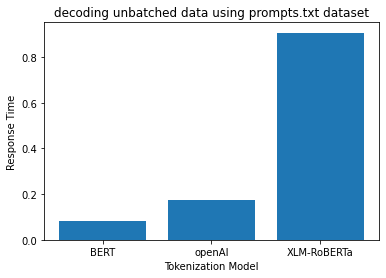

In [52]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(prompts_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(prompts_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list

start_time_bert = time.time()
for element in ids_bert:
    detokenized_sentence_bert = tokenizer_bert.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_bert)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

start_time_openai = time.time()
for element in ids_openai:
    detokenized_sentence_openai = tokenizer_openai.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_openai)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai


start_time_xlmroberta = time.time()
for element in ids_xlmroberta:
    detokenized_sentences_xlmroberta = tokenizer_xlmroberta.decode(element, skip_special_tokens=True)
    #print(detokenized_sentences_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for detokenizing unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding unbatched data using prompts.txt dataset')
plt.show()

In [ ]:
<h1>Comparision of decoding unbatched data using glassdoor.txt dataset<h1>

Response time for detokenizing unbatched data with BERT tokenization model: 1.1368136405944824 seconds
Response time for detokenizing unbatched data with openAI tokenization model: 2.431659460067749 seconds
Response time for detokenizing unbatched data with XLMRoberta tokenization model: 4.934390544891357 seconds


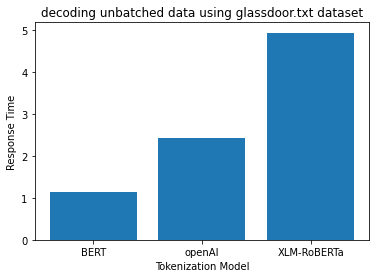

In [54]:
tokenized_sentences_bert = tokenizer_bert.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_openai = tokenizer_openai.batch_encode_plus(glassdoor_lines, add_special_tokens=True)
tokenized_sentences_xlmroberta = tokenizer_xlmroberta.batch_encode_plus(glassdoor_lines, add_special_tokens=True)

ids_bert = list(tokenized_sentences_bert["input_ids"]) # Store the tokenized IDs(Bert tokenization method) in a list
ids_openai = list(tokenized_sentences_openai["input_ids"]) # Store the tokenized IDs(openai tokenization method) in a list
ids_xlmroberta = list(tokenized_sentences_xlmroberta["input_ids"]) # Store the tokenized IDs(XLM-RoBERTa tokenization method) in a list

start_time_bert = time.time()
for element in ids_bert:
    detokenized_sentence_bert = tokenizer_bert.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_bert)
end_time_bert = time.time()
response_time_bert = end_time_bert - start_time_bert

start_time_openai = time.time()
for element in ids_openai:
    detokenized_sentence_openai = tokenizer_openai.decode(element, skip_special_tokens=True)
    #print(detokenized_sentence_openai)
end_time_openai = time.time()
response_time_openai = end_time_openai - start_time_openai


start_time_xlmroberta = time.time()
for element in ids_xlmroberta:
    detokenized_sentences_xlmroberta = tokenizer_xlmroberta.decode(element, skip_special_tokens=True)
    #print(detokenized_sentences_xlmroberta)
end_time_xlmroberta = time.time()
response_time_xlmroberta = end_time_xlmroberta - start_time_xlmroberta


print(f"Response time for detokenizing unbatched data with BERT tokenization model: {response_time_bert} seconds")
print(f"Response time for detokenizing unbatched data with openAI tokenization model: {response_time_openai} seconds")
print(f"Response time for detokenizing unbatched data with XLMRoberta tokenization model: {response_time_xlmroberta} seconds")

models = ['BERT', 'openAI', 'XLM-RoBERTa']
response_times = [response_time_bert, response_time_openai, response_time_xlmroberta]
plt.bar(models, response_times)
plt.xlabel('Tokenization Model')
plt.ylabel('Response Time')
plt.title('decoding unbatched data using glassdoor.txt dataset')
plt.show()